In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# age = age of patient
# sex = sex of patient (1=male, 0=female)
# cp = chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
# trtbps = resting blood pressure (mmHg)
# chol = total cholesterol (mg/dl)
# fbs = fasting blood sugar >120 mg/dl, diabetic indicator, (1 = true, 0 = false)
# restecg resting electrocardiograph result (0 = normal, 1 = ST-T wave normaility, 2 = left ventricular hypertrophy)
# thalachh = max heart rate achieved
# oldpeak
# slp = slope
# caa = Number of major vessels obstructed
# thall
# exng = exercised induced angina (1 = yes, 0 = no)
# output = Target variable

In [6]:
catagorical = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp']
continuous = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
outcome = ["output"]

In [8]:
for i, row in df.iterrows():
    df.loc[i, 'chol'] *= .02586

In [ ]:
# remove thall as unable to determine what it represents
del df['thall']

In [32]:
df[continuous].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.00000,47.50000,55.0000,61.00000,77.00000
trtbps,303.0,131.623762,17.538143,94.00000,120.00000,130.0000,140.00000,200.00000
chol,303.0,6.368388,1.340343,3.25836,5.45646,6.2064,7.09857,14.58504
thalachh,303.0,149.646865,22.905161,71.00000,133.50000,153.0000,166.00000,202.00000
oldpeak,303.0,1.039604,1.161075,0.00000,0.00000,0.8000,1.60000,6.20000


In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Text(0.5, 1.0, 'Gender')

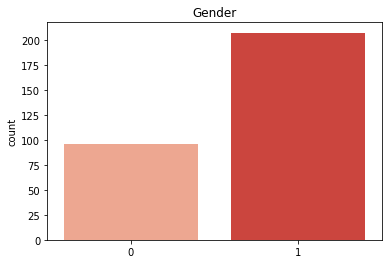

In [10]:
# sex
pl1 = sns.countplot(data=df,x='sex',palette="Reds")
pl1.set_xlabel("")
pl1.set_ylabel("count")
pl1.set_title("Gender")

Text(0.5, 1.0, 'Exercise Induced Angina')

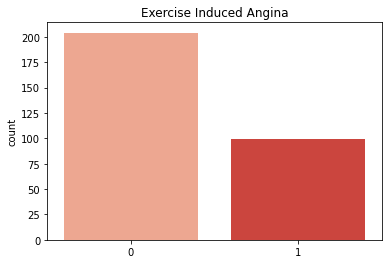

In [11]:
#exercise induced angina
pl2 = sns.countplot(data=df,x='exng', palette="Reds")
pl2.set_xlabel("")
pl2.set_ylabel("count")
pl2.set_title("Exercise Induced Angina")

Text(0.5, 1.0, 'Number of Obstructed Vessels')

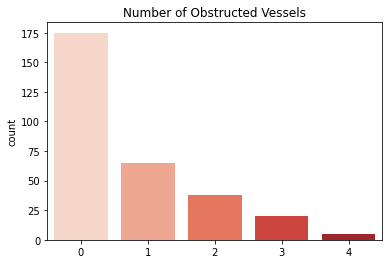

In [12]:
#number of blood vessels obstructed
pl3 = sns.countplot(data=df,x='caa', palette="Reds")
pl3.set_xlabel("")
pl3.set_ylabel("count")
pl3.set_title("Number of Obstructed Vessels")

Text(0.5, 1.0, 'Catagories of Angina')

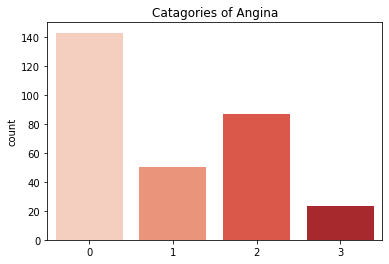

In [13]:
#angina
pl4 = sns.countplot(data=df,x='cp', palette="Reds")
pl4.set_xlabel("")
pl4.set_ylabel("count")
pl4.set_title("Catagories of Angina")

Text(0.5, 1.0, 'Diabetic status')

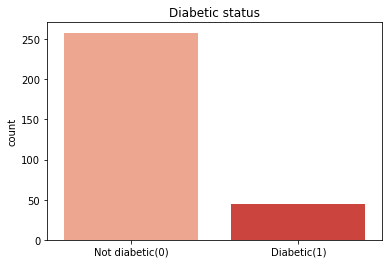

In [14]:
#diabetic status
pl5 = sns.countplot(data=df,x='fbs', palette="Reds")
pl5.set_xlabel("")
pl5.set_ylabel("count")
pl5.set_xticklabels(["Not diabetic(0)","Diabetic(1)"])
pl5.set_title("Diabetic status")

Text(0.5, 1.0, 'Catagories for ECGs')

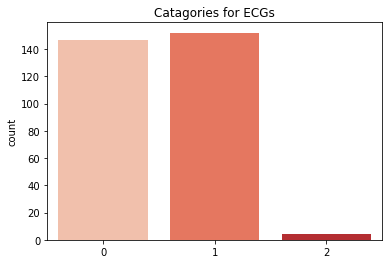

In [15]:
#resting ecg
pl6 = sns.countplot(data=df,x='restecg', palette="Reds")
pl6.set_xlabel("")
pl6.set_ylabel("count")
pl6.set_title("Catagories for ECGs")

Text(0.5, 1.0, 'Distribution of age')

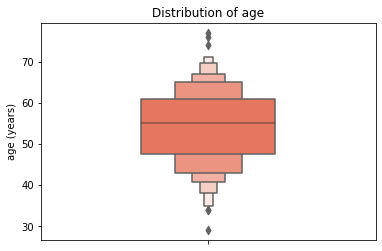

In [33]:
pl8 = sns.boxenplot(y=df['age'],width=0.4, palette="Reds")
pl8.set_xlabel("")
pl8.set_ylabel("age (years)")
pl8.set_title("Distribution of age")

Text(0.5, 1.0, 'Distribution of Systollic Blood Pressure')

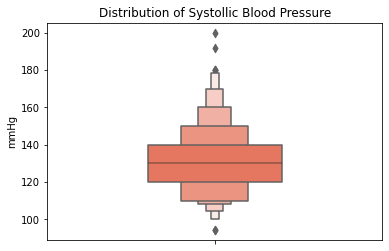

In [18]:
pl9 = sns.boxenplot(y=df['trtbps'],width=0.4, palette="Reds")
pl9.set_xlabel("")
pl9.set_ylabel("mmHg")
pl9.set_title("Distribution of Systollic Blood Pressure")

Text(0.5, 1.0, 'Distribution of Cholesterol')

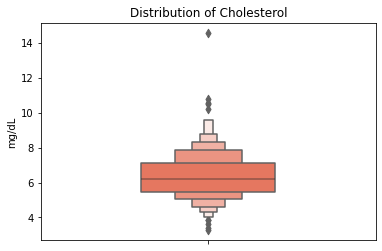

In [19]:
pl10 = sns.boxenplot(y=df['chol'],width=0.4, palette="Reds")
pl10.set_xlabel("")
pl10.set_ylabel("mg/dL")
pl10.set_title("Distribution of Cholesterol")

Text(0.5, 1.0, 'Distribution of Max Heart Rate')

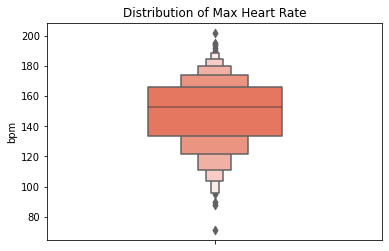

In [20]:
pl11 = sns.boxenplot(y=df['thalachh'],width=0.4, palette="Reds")
pl11.set_xlabel("")
pl11.set_ylabel("bpm")
pl11.set_title("Distribution of Max Heart Rate")

Text(0.5, 1.0, 'Catagories for target outcome')

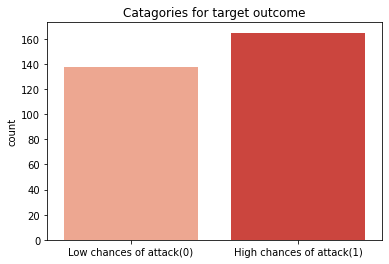

In [21]:
pl12 = sns.countplot(data=df, x = 'output', palette="Reds")
pl12.set_xlabel("")
pl12.set_ylabel("count")
pl12.set_xticklabels(["Low chances of attack(0)","High chances of attack(1)"])
pl12.set_title("Catagories for target outcome")

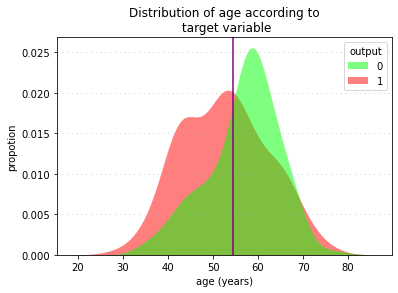

In [23]:
pl13 = sns.kdeplot(data=df, x='age',hue="output", fill=True,palette=["#00ff00","#ff0000"], alpha=.5, linewidth=0)
pl13.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl13.set_xlabel("age (years)")
pl13.set_ylabel("propotion")
pl13.set_title("Distribution of age according to\n target variable")
plt.axvline(x=df['age'].mean(), color='purple')

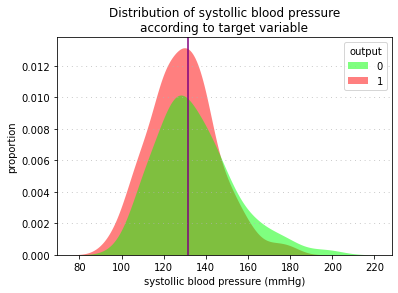

In [24]:
pl14 = sns.kdeplot(data=df, x='trtbps',hue="output", fill=True,palette=["#00ff00","#ff0000"], alpha=.5, linewidth=0)
pl14.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl14.set_xlabel("systollic blood pressure (mmHg)")
pl14.set_ylabel("proportion")
pl14.set_title("Distribution of systollic blood pressure\naccording to target variable")
plt.axvline(x=df['trtbps'].mean(), color='purple')

Text(0.5, 1.0, 'Strip Plot of diabetes vs age')

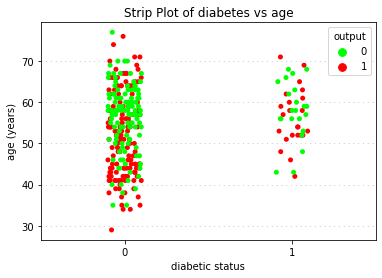

In [25]:
pl15 = sns.stripplot(data=df,x='fbs',y='age',hue='output',palette=["#00ff00","#ff0000"])
pl15.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl15.set_xlabel("diabetic status")
pl15.set_ylabel("age (years)")
pl15.set_title("Strip Plot of diabetes vs age")

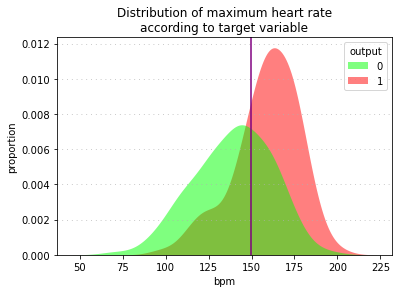

In [26]:
pl16 = sns.kdeplot(data=df, x='thalachh',hue="output", fill=True,palette=["#00ff00","#ff0000"], alpha=.5, linewidth=0)
pl16.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl16.set_xlabel("bpm")
pl16.set_ylabel("proportion")
pl16.set_title("Distribution of maximum heart rate\naccording to target variable")
plt.axvline(x=df['thalachh'].mean(), color='purple')

Text(0.5, 1.0, 'Distribution of Thalium stress test result\naccording to target variable')

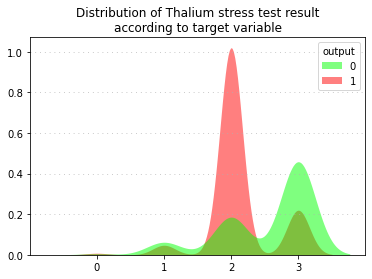

In [27]:
pl17 = sns.kdeplot(data=df, x='thall',hue="output", fill=True,palette=["#00ff00","#ff0000"], alpha=.5, linewidth=0)
pl17.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl17.set_xlabel("")
pl17.set_ylabel("")
pl17.set_title("Distribution of thalassemia\naccording to target variable")

Text(0.5, 1.0, 'Distribution of chest pain catagories\naccording to target variable')

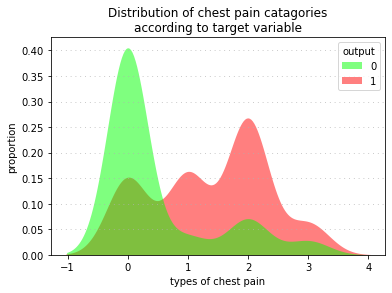

In [28]:
pl18 = sns.kdeplot(data=df, x='cp',hue="output", fill=True,palette=["#00ff00","#ff0000"], alpha=.5, linewidth=0)
pl18.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl18.set_xlabel("types of chest pain")
pl18.set_ylabel("proportion")
pl18.set_title("Distribution of chest pain catagories\naccording to target variable")

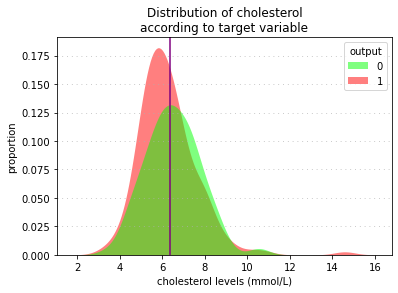

In [34]:
pl19 = sns.kdeplot(data=df, x='chol',hue="output", fill=True,palette=["#00ff00","#ff0000"], alpha=.5, linewidth=0)
pl19.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl19.set_xlabel("cholesterol levels (mmol/L)")
pl19.set_ylabel("proportion")
pl19.set_title("Distribution of cholesterol\naccording to target variable")
plt.axvline(x=df['chol'].mean(), color='purple')

Text(0.5, 1.0, 'Distribution of obstructed vessels\naccording to target variable')

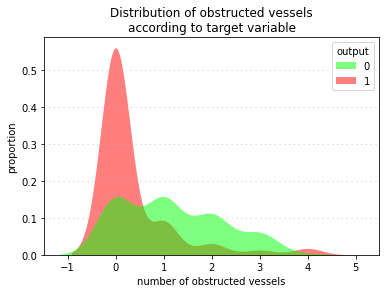

In [35]:
pl20 = sns.kdeplot(data=df, x='caa',hue="output", fill=True,palette=["#00ff00","#ff0000"], alpha=.5, linewidth=0)
pl20.grid(linestyle=':', axis='y', zorder=0,  dashes=(1,5))
pl20.set_xlabel("number of obstructed vessels")
pl20.set_ylabel("proportion")
pl20.set_title("Distribution of obstructed vessels\naccording to target variable")